# Praca z pakietami openpyxl, xlsxwriter, xlrd i xlwt

In [31]:
pip install openpyxl xlsxwriter xlrd xlwt

Note: you may need to restart the kernel to use updated packages.


#### Ćwiczenie 1

In [2]:
# openpyxl: Tworzenie nowego pliku Excel, odczyt danych

from openpyxl import Workbook
wb = Workbook()
ws = wb.active
ws['A1'] = "Hello, Openpyxl!"
wb.save('openpyxl_example_reminder.xlsx')

In [5]:
# odczyt danych

from openpyxl import load_workbook
wb = load_workbook('openpyxl_example_reminder.xlsx')
ws = wb.active
print(ws['A1'].value)


Hello, Openpyxl!


#### Ćwiczenie 2

In [9]:
# xlsxwriter: Tworzenie nowego pliku Excel z formatowaniem

import xlsxwriter
workbook = xlsxwriter.Workbook('xlsxwriter_example_reminder.xlsx')
worksheet = workbook.add_worksheet()
worksheet.write('A1', 'Hello, XlsxWriter!')
format = workbook.add_format({'bold': True, 'font_color': 'red'})
worksheet.write('A2', 'Formatted text', format)
workbook.close()


#### Ćwiczenie 3

In [13]:
# xlrd: Odczyt danych z pliku Excel

import xlrd
workbook = xlrd.open_workbook(r'C:\Users\PabloPapito\Downloads\jobsInData\jobsInDataXLS.xls')
sheet = workbook.sheet_by_index(0)
print(sheet.cell_value(0, 0))


work_year


#### Ćwiczenie 4

In [17]:
# xlwt: Tworzenie nowego pliku Excel

import xlwt
workbook = xlwt.Workbook()
sheet = workbook.add_sheet('Sheet 1')
sheet.write(0, 0, 'Hello, Xlwt!')
workbook.save('xlwt_example_reminder.xls')


#### Ćwiczenie 5

In [20]:
# Tworzenie nowego pliku Excel za pomocą openpyxl

from openpyxl import Workbook

wb = Workbook()
ws = wb.active
ws['A1'] = "Hello, Openpyxl!"
ws['A2'] = "This is a test."
wb.save('openpyxl_example_3rd.xlsx')

from openpyxl import load_workbook
wb = load_workbook('openpyxl_example_3rd.xlsx')
ws = wb.active
print(ws['A1'].value)
print(ws['A2'].value)


Hello, Openpyxl!
This is a test.


#### Ćwiczenie 6

In [55]:
import xlsxwriter

# Tworzenie nowego pliku Excel
workbook = xlsxwriter.Workbook('xlsxwriter_example_chart.xlsx')
worksheet = workbook.add_worksheet()

# Dodawanie danych do arkusza
data = [
    ['Category', 'Value1', 'Value2', 'Value3'],
    ['A', 10, 20, 30],
    ['B', 40, 30, 20],
    ['C', 50, 60, 70],
    ['D', 20, 40, 60]
]

# Zapis danych do komórek
row = 0
col = 0
for category, value1, value2, value3 in data:
    worksheet.write(row, col, category)
    worksheet.write(row, col + 1, value1)
    worksheet.write(row, col + 2, value2)
    worksheet.write(row, col + 3, value3)
    row += 1

# Tworzenie wykresu kolumnowego
chart = workbook.add_chart({'type': 'column'})

# Konfiguracja serii danych
for i in range(1, 4):
    chart.add_series({
        'name':       f'=Sheet1!${chr(65 + i)}$1',
        'categories': '=Sheet1!$A$2:$A$5',
        'values':     f'=Sheet1!${chr(65 + i)}$2:${chr(65 + i)}$5',
        'data_labels': {'value': True},
    })

# Dodawanie tytułów i osi
chart.set_title({'name': 'Sample Column Chart'})
chart.set_x_axis({'name': 'Category'})
chart.set_y_axis({'name': 'Values'})

# Formatowanie wykresu
chart.set_style(11)

# Wstawianie wykresu do arkusza
worksheet.insert_chart('E2', chart)

# Zamknięcie pliku
workbook.close()


#### Ćwiczenie 7

In [57]:
# Odczyt danych

from openpyxl import load_workbook

# Wczytywanie pliku Excel
workbook = load_workbook('xlsxwriter_example_chart.xlsx')
worksheet = workbook.active

# Wyświetlanie zawartości wszystkich komórek
for row in worksheet.iter_rows(values_only=True):
    print(row)

# Wyświetlanie informacji o wykresach
for chart in worksheet._charts:
    print(f"Chart type: {chart.type}")
    for series in chart.series:
        print(f"Series: {series}")


('Category', 'Value1', 'Value2', 'Value3')
('A', 10, 20, 30)
('B', 40, 30, 20)
('C', 50, 60, 70)
('D', 20, 40, 60)
Chart type: col
Series: <openpyxl.chart.series.Series object>
Parameters:

Series: <openpyxl.chart.series.Series object>
Parameters:

Series: <openpyxl.chart.series.Series object>
Parameters:



In [59]:
# odczyt danych z pandas

import pandas as pd

# Wczytywanie pliku Excel za pomocą pandas
df = pd.read_excel('xlsxwriter_example_chart.xlsx', sheet_name=None)

# Wyświetlanie nazw arkuszy
print(df.keys())

# Wyświetlanie zawartości pierwszego arkusza
print(df['Sheet1'])


dict_keys(['Sheet1'])
  Category  Value1  Value2  Value3
0        A      10      20      30
1        B      40      30      20
2        C      50      60      70
3        D      20      40      60


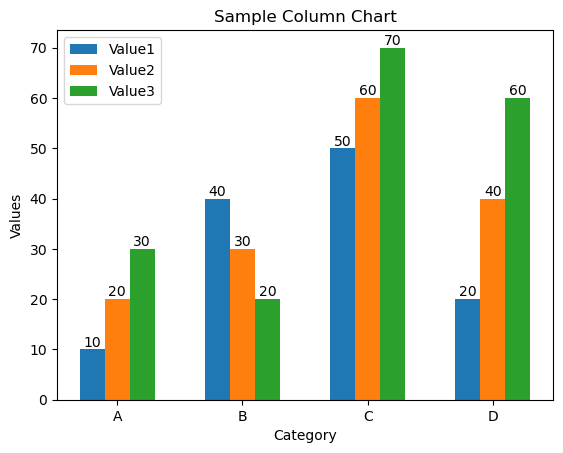

In [64]:
# odczyt danych i stworzenie wykresu w pythonie

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Wczytywanie pliku Excel za pomocą pandas
df = pd.read_excel('xlsxwriter_example_chart.xlsx', sheet_name='Sheet1')

# Tworzenie wykresu w Pythonie
fig, ax = plt.subplots()

# Dane
categories = df['Category']
values1 = df['Value1']
values2 = df['Value2']
values3 = df['Value3']

# Szerokość słupków
bar_width = 0.2
index = np.arange(len(categories))

# Tworzenie słupków
bar1 = plt.bar(index, values1, bar_width, label='Value1')
bar2 = plt.bar(index + bar_width, values2, bar_width, label='Value2')
bar3 = plt.bar(index + 2 * bar_width, values3, bar_width, label='Value3')

# Dodanie etykiet do osi
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Sample Column Chart')
plt.xticks(index + bar_width, categories)
plt.legend()

# Dodanie wartości na słupkach
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

# Wyświetlenie wykresu
plt.show()
